In [1]:
import numpy as np
import pandas as pd
import matplotlib as mtb
import seaborn as sns

In [2]:
#reading the file 
inp = pd.read_csv("Leads.csv")
inp.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# EXPLORATORY DATA ANALYSIS

## Step 1: Data Cleaning & Treatment:

In [3]:
#checking the percentage of null value 
round((inp.isnull().sum()/len(inp.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [4]:
# Droping the coloumn whose null value is greater than 30%
for i in inp:
    if round((inp[i].isnull().sum()/len(inp[i].index))*100,2)>30:
        inp.drop(i,axis = 1 , inplace = True)

In [5]:
#checking the null value after droping

round((inp.isnull().sum()/len(inp.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [6]:
# Checking if the value in the column having select 
for i in inp:
    print(inp[i].astype('category').value_counts())

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

In [7]:
# droping the column having value select 
inp1 = inp.drop(columns=['Lead Profile','How did you hear about X Education'],axis =1)

In [8]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# checking for data inbalance 
for i in inp1:
    print(inp1[i].astype('category').value_counts())

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

In [10]:
# As some of the column having data inbalance so droping the column as it will not give better result
inp1 = inp1.drop(columns = ['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'])

In [11]:
inp1 = inp1.drop(columns = ['What matters most to you in choosing a course','City','Country','I agree to pay the amount through cheque'], axis = 1)

In [12]:
# check the null value in ascending order
inp1.isnull().sum().sort_values(ascending = False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

#### As we can see that there is more number of missing vale in what is your current occupation so dropping the column may effect your analysis so better to drop the rows.

In [13]:
inp1 = inp1[~pd.isnull(inp1['What is your current occupation'])]

In [14]:
# check the null value in ascending order after droping null rows from What is your current occupation
inp1.isnull().sum().sort_values(ascending = False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

#### Still we have the missing data so we are droping the row 

In [15]:
# Droping and checking the null value
inp1 = inp1[~pd.isnull(inp1['TotalVisits'])]
inp1.isnull().sum().sort_values(ascending = False)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [16]:
# Droping and checking the null value
inp1 = inp1[~pd.isnull(inp1['Lead Source'])]
inp1.isnull().sum().sort_values(ascending = False)

Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [17]:
# Droping and checking the null value
inp1 = inp1[~pd.isnull(inp1['Specialization'])]
inp1.isnull().sum().sort_values(ascending = False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [18]:
# So checking how much data left
print(len(inp1))
print((len(inp1)/len(inp))*100)

6373
68.97186147186147


In [23]:
# Checking for dublicate value 
inp1.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [24]:
# Checking for dublicate value 
inp1.duplicated(subset = ['Lead Number'], keep = False).sum()

0

In [33]:
# After checking dublicate droping both prospectID and Lead number as it is not that helpful for analysis.
inp1 = inp1.drop(columns =['Prospect ID','Lead Number'], axis = 1)

### Categorical Attributes Analysis:

In [576]:
#checking the categorical data 
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [25]:
# getting the dummy value for catogorical value
dummy = pd.get_dummies(inp1[['Lead Origin','Lead Source','Do Not Email','Last Activity','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity']],drop_first = True)

In [26]:
# concating the dummy variable and lead data
inp1 = pd.concat ([inp1,dummy],axis = 1)

In [27]:
# checking the Categorical data  
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 67 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           6373 non-null   object 
 1   Lead Number                                           6373 non-null   int64  
 2   Lead Origin                                           6373 non-null   object 
 3   Lead Source                                           6373 non-null   object 
 4   Do Not Email                                          6373 non-null   object 
 5   Converted                                             6373 non-null   int64  
 6   TotalVisits                                           6373 non-null   float64
 7   Total Time Spent on Website                           6373 non-null   int64  
 8   Page Views Per Visit                                  6373

In [28]:
# making dummy of Specialization column and droping the select column 
dummy1 = pd.get_dummies(inp1['Specialization'],prefix = 'spe')
dummy1 = dummy1.drop(['spe_Select'], axis =1)


In [29]:
#checking the column Specialization
dummy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   spe_Banking, Investment And Insurance  6373 non-null   uint8
 1   spe_Business Administration            6373 non-null   uint8
 2   spe_E-Business                         6373 non-null   uint8
 3   spe_E-COMMERCE                         6373 non-null   uint8
 4   spe_Finance Management                 6373 non-null   uint8
 5   spe_Healthcare Management              6373 non-null   uint8
 6   spe_Hospitality Management             6373 non-null   uint8
 7   spe_Human Resource Management          6373 non-null   uint8
 8   spe_IT Projects Management             6373 non-null   uint8
 9   spe_International Business             6373 non-null   uint8
 10  spe_Marketing Management               6373 non-null   uint8
 11  spe_Media and Advertising     

In [30]:
inp1 = pd.concat([inp1,dummy1], axis = 1)

In [31]:
# droping the column which already converted into dummies
inp1 = inp1.drop(['Lead Origin','Lead Source','Do Not Email','Last Activity','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity','Specialization'], axis = 1)


In [34]:
# checking the head
inp1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,spe_IT Projects Management,spe_International Business,spe_Marketing Management,spe_Media and Advertising,spe_Operations Management,spe_Retail Management,spe_Rural and Agribusiness,spe_Services Excellence,spe_Supply Chain Management,spe_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Test-Train Split

In [35]:
# Importing train test model
from sklearn.model_selection import train_test_split

In [36]:
# putting all the feature variable in x
X = inp1
X = X.drop(columns = ['Converted'], axis =1)

In [37]:
# Put the target variable in y
Y = inp1['Converted']

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7, test_size=0.3, random_state=100)

### Feature scalling

In [39]:
# import standred scaler for scaling the data 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [40]:
scaler = StandardScaler()

In [41]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,spe_IT Projects Management,spe_International Business,spe_Marketing Management,spe_Media and Advertising,spe_Operations Management,spe_Retail Management,spe_Rural and Agribusiness,spe_Services Excellence,spe_Supply Chain Management,spe_Travel and Tourism
8003,0.064874,-0.824395,-0.223652,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.064874,-0.611929,0.753710,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.431907,-0.804919,1.731071,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,-0.669191,-0.943022,-1.201013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,-0.669191,-0.943022,-1.201013,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#Looking at the corelation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

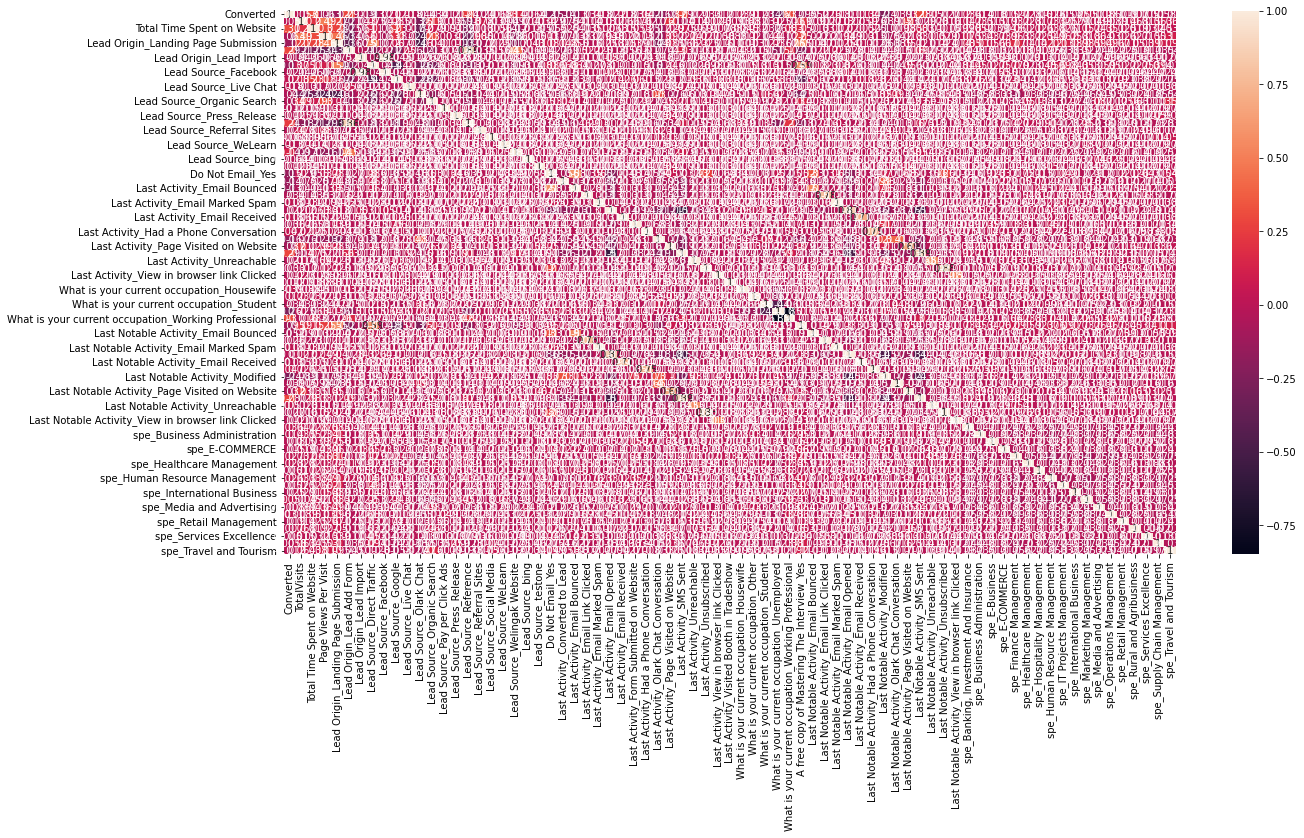

In [43]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(inp1.corr(),annot = True)
plt.show()

In [44]:
# As it is not possible to see corelation in heatmap lets try on table

In [45]:
inp1.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,spe_IT Projects Management,spe_International Business,spe_Marketing Management,spe_Media and Advertising,spe_Operations Management,spe_Retail Management,spe_Rural and Agribusiness,spe_Services Excellence,spe_Supply Chain Management,spe_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.133206,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spe_Retail Management,-0.018603,0.014223,0.024919,0.026099,0.070983,-0.025339,-0.007261,0.022168,-0.007395,0.021190,...,-0.023773,-0.016437,-0.037930,-0.017920,-0.028459,1.000000,-0.010668,-0.006986,-0.023639,-0.017223
spe_Rural and Agribusiness,0.006964,0.068015,0.018767,0.027465,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.020467,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.006014,-0.020352,-0.014828
spe_Services Excellence,-0.005142,0.015114,0.003203,0.015230,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.013403,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,1.000000,-0.013327,-0.009710
spe_Supply Chain Management,0.005785,0.063383,0.045386,0.052972,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.045353,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.013327,1.000000,-0.032857


## Step 2: Model building

### Importing logisting regression and creating the object

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [48]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, Y_train)

In [49]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [50]:
#select feature by RFE 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 41),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 42),
 ('Lead Source_Press_Release', False, 55),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Social Media', False, 60),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 27),
 ('Lead Source_testone', False, 37),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 22),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link

In [51]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [52]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [53]:
#checking the info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4461 entries, 8003 to 8217
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Total Time Spent on Website                           4461 non-null   float64
 1   Lead Origin_Lead Add Form                             4461 non-null   uint8  
 2   Lead Source_Olark Chat                                4461 non-null   uint8  
 3   Lead Source_Reference                                 4461 non-null   uint8  
 4   Lead Source_Welingak Website                          4461 non-null   uint8  
 5   Do Not Email_Yes                                      4461 non-null   uint8  
 6   Last Activity_Had a Phone Conversation                4461 non-null   uint8  
 7   Last Activity_SMS Sent                                4461 non-null   uint8  
 8   What is your current occupation_Housewife             4

In [54]:
# import stats model 
import statsmodels.api as sm

In [55]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.7
Date:                Tue, 03 Jan 2023   Deviance:                       4077.4
Time:                        12:08:02   Pearson chi2:                 4.69e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6583      0.602      1.094      0.274      -0.521       1.838
Total Time Spent on Website                              1.0948      0.046     23.674      0.000       1.004       1.185
Lead Origin_Lead Add Form                                2.8029      1.219      2.299      0.022       0.413       5.193
Lead Source_Olark Chat                                   1.2977      0.114     11.342      0.000       1.073       1.522
Lead Source_Reference                                    1.2756      1.243      1.026      0.305      -1.161       3.712
Lead Source_Welingak Website                             3.2908      1.580      2.082      0.037       0.193       6.388
Do Not Email_Yes                                        -1.4166      0.193     -7.327      0.000      -1.795      -1.038
Last Activity_Had a Phone Conversation                   1.6253      0.984      1.652      0.099      -0.304       3.554
Last Activity_SMS Sent                                   0.9927      0.084     11.771      0.000       0.827       1.158
What is your current occupation_Housewife               22.4128   2.39e+04      0.001      0.999   -4.69e+04    4.69e+04
What is your current occupation_Student                 -1.3322      0.639     -2.085      0.037      -2.585      -0.080
What is your current occupation_Unemployed              -1.4578      0.603     -2.418      0.016      -2.639      -0.276
What is your current occupation_Working Professional     1.1501      0.632      1.820      0.069      -0.088       2.389
Last Notable Activity_Had a Phone Conversation          22.4823   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Modified                          -0.8433      0.090     -9.400      0.000      -1.019      -0.667
Last Notable Activity_Unreachable                        2.4696      0.807      3.061      0.002       0.888       4.051
========================================================================================================================
"""

### we can see some variable having p - value more than 0.05 so let check VIF

In [57]:
# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,84.15
3,Lead Source_Reference,65.19
4,Lead Source_Welingak Website,20.03
6,Last Activity_Had a Phone Conversation,2.45
12,Last Notable Activity_Had a Phone Conversation,2.44
10,What is your current occupation_Unemployed,2.43
7,Last Activity_SMS Sent,1.68
13,Last Notable Activity_Modified,1.57
2,Lead Source_Olark Chat,1.37
11,What is your current occupation_Working Profes...,1.31


In [59]:
# Lead Source_Reference having high vif value and p value so drop this columnthan check 
col = col.drop('Lead Source_Reference', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2039.1
Date:                Tue, 03 Jan 2023   Deviance:                       4078.2
Time:                        12:10:58   Pearson chi2:                 4.67e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6590      0.602      1.095      0.273      -0.520       1.838
Total Time Spent on Website                              1.0948      0.046     23.672      0.000       1.004       1.185
Lead Origin_Lead Add Form                                4.0401      0.256     15.794      0.000       3.539       4.541
Lead Source_Olark Chat                                   1.2976      0.114     11.340      0.000       1.073       1.522
Lead Source_Welingak Website                             2.0535      1.037      1.980      0.048       0.020       4.087
Do Not Email_Yes                                        -1.4149      0.193     -7.325      0.000      -1.794      -1.036
Last Activity_Had a Phone Conversation                   1.6255      0.984      1.652      0.099      -0.303       3.554
Last Activity_SMS Sent                                   0.9929      0.084     11.774      0.000       0.828       1.158
What is your current occupation_Housewife               22.4142   2.39e+04      0.001      0.999   -4.69e+04    4.69e+04
What is your current occupation_Student                 -1.3317      0.639     -2.084      0.037      -2.584      -0.080
What is your current occupation_Unemployed              -1.4586      0.603     -2.420      0.016      -2.640      -0.277
What is your current occupation_Working Professional     1.1503      0.632      1.821      0.069      -0.088       2.389
Last Notable Activity_Had a Phone Conversation          22.4824   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Modified                          -0.8434      0.090     -9.403      0.000      -1.019      -0.668
Last Notable Activity_Unreachable                        2.4700      0.807      3.062      0.002       0.889       4.051
========================================================================================================================
"""

In [61]:
#checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
5,Last Activity_Had a Phone Conversation,2.45
11,Last Notable Activity_Had a Phone Conversation,2.44
9,What is your current occupation_Unemployed,2.43
6,Last Activity_SMS Sent,1.68
1,Lead Origin_Lead Add Form,1.65
12,Last Notable Activity_Modified,1.57
2,Lead Source_Olark Chat,1.37
3,Lead Source_Welingak Website,1.33
10,What is your current occupation_Working Profes...,1.31
0,Total Time Spent on Website,1.28


In [62]:
# droping the column having high p value
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

In [63]:
# checking the p valluue
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.1
Date:                Tue, 03 Jan 2023   Deviance:                       4082.2
Time:                        12:13:13   Pearson chi2:                 4.67e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6621      0.602      1.101      0.271      -0.517       1.841
Total Time Spent on Website                              1.0934      0.046     23.650      0.000       1.003       1.184
Lead Origin_Lead Add Form                                4.0398      0.256     15.790      0.000       3.538       4.541
Lead Source_Olark Chat                                   1.2964      0.114     11.329      0.000       1.072       1.521
Lead Source_Welingak Website                             2.0524      1.037      1.978      0.048       0.019       4.086
Do Not Email_Yes                                        -1.4145      0.193     -7.323      0.000      -1.793      -1.036
Last Activity_Had a Phone Conversation                   2.8923      0.799      3.621      0.000       1.327       4.458
Last Activity_SMS Sent                                   0.9911      0.084     11.756      0.000       0.826       1.156
What is your current occupation_Housewife               21.4143   1.45e+04      0.001      0.999   -2.84e+04    2.85e+04
What is your current occupation_Student                 -1.3321      0.639     -2.085      0.037      -2.584      -0.080
What is your current occupation_Unemployed              -1.4585      0.603     -2.420      0.016      -2.640      -0.277
What is your current occupation_Working Professional     1.1492      0.632      1.819      0.069      -0.089       2.387
Last Notable Activity_Modified                          -0.8522      0.090     -9.511      0.000      -1.028      -0.677
Last Notable Activity_Unreachable                        2.4663      0.807      3.057      0.002       0.885       4.047
========================================================================================================================
"""

In [64]:
#checking vif as the value are less than 5 we cill drop the column having more p value. 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.43
6,Last Activity_SMS Sent,1.68
1,Lead Origin_Lead Add Form,1.65
11,Last Notable Activity_Modified,1.56
2,Lead Source_Olark Chat,1.37
3,Lead Source_Welingak Website,1.33
10,What is your current occupation_Working Profes...,1.31
0,Total Time Spent on Website,1.28
4,Do Not Email_Yes,1.09
8,What is your current occupation_Student,1.04


In [65]:
col = col.drop('What is your current occupation_Housewife',1)

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.1
Date:                Tue, 03 Jan 2023   Deviance:                       4086.2
Time:                        12:15:14   Pearson chi2:                 4.68e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1870      0.552      2.148      0.032       0.104       2.270
Total Time Spent on Website                              1.0930      0.046     23.647      0.000       1.002       1.184
Lead Origin_Lead Add Form                                4.0395      0.256     15.792      0.000       3.538       4.541
Lead Source_Olark Chat                                   1.2949      0.114     11.315      0.000       1.071       1.519
Lead Source_Welingak Website                             2.0525      1.037      1.979      0.048       0.019       4.086
Do Not Email_Yes                                        -1.4186      0.193     -7.334      0.000      -1.798      -1.039
Last Activity_Had a Phone Conversation                   2.8916      0.799      3.620      0.000       1.326       4.457
Last Activity_SMS Sent                                   0.9914      0.084     11.760      0.000       0.826       1.157
What is your current occupation_Student                 -1.8569      0.593     -3.131      0.002      -3.019      -0.695
What is your current occupation_Unemployed              -1.9833      0.554     -3.581      0.000      -3.069      -0.898
What is your current occupation_Working Professional     0.6242      0.585      1.067      0.286      -0.523       1.771
Last Notable Activity_Modified                          -0.8508      0.090     -9.502      0.000      -1.026      -0.675
Last Notable Activity_Unreachable                        2.4648      0.807      3.054      0.002       0.883       4.046
========================================================================================================================
"""

In [67]:
# droping the column What is your current occupation_Working Professional as p value is more than 0.05
col = col.drop('What is your current occupation_Working Professional',1)


In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.7
Date:                Tue, 03 Jan 2023   Deviance:                       4087.3
Time:                        12:16:56   Pearson chi2:                 4.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.7491      0.188      9.296      0.000       1.380       2.118
Total Time Spent on Website                    1.0931      0.046     23.647      0.000       1.003       1.184
Lead Origin_Lead Add Form                      4.0410      0.256     15.799      0.000       3.540       4.542
Lead Source_Olark Chat                         1.2964      0.114     11.330      0.000       1.072       1.521
Lead Source_Welingak Website                   2.0508      1.037      1.977      0.048       0.018       4.084
Do Not Email_Yes                              -1.4175      0.193     -7.328      0.000      -1.797      -1.038
Last Activity_Had a Phone Conversation         2.8940      0.799      3.624      0.000       1.329       4.459
Last Activity_SMS Sent                         0.9945      0.084     11.810      0.000       0.829       1.159
What is your current occupation_Student       -2.4199      0.284     -8.513      0.000      -2.977      -1.863
What is your current occupation_Unemployed    -2.5468      0.188    -13.542      0.000      -2.915      -2.178
Last Notable Activity_Modified                -0.8510      0.090     -9.504      0.000      -1.026      -0.675
Last Notable Activity_Unreachable              2.4662      0.807      3.056      0.002       0.885       4.048
==============================================================================================================
"""

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
8,What is your current occupation_Unemployed,2.19
6,Last Activity_SMS Sent,1.52
1,Lead Origin_Lead Add Form,1.51
9,Last Notable Activity_Modified,1.50
2,Lead Source_Olark Chat,1.34
3,Lead Source_Welingak Website,1.30
0,Total Time Spent on Website,1.24
4,Do Not Email_Yes,1.09
7,What is your current occupation_Student,1.04
5,Last Activity_Had a Phone Conversation,1.01


## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [70]:
# Use 'predict' to predict the probabilities on the train set and reshaping it into an array
Y_train_pred = res.predict(X_train_sm).values.reshape(-1)
Y_train_pred[:10]

array([0.33083001, 0.08967657, 0.07388062, 0.37000908, 0.96109341,
       0.1206137 , 0.12330796, 0.91373557, 0.05187475, 0.98611847])

 Creating a dataframe with the actual conversion flag and the predicted probabilities

In [71]:
Y_train_pred_final = pd.DataFrame({'Converted': Y_train.values, 'Conversion_Prob': Y_train_pred})
Y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.330830
1,0,0.089677
2,1,0.073881
3,1,0.370009
4,1,0.961093


In [72]:
# Making new column where the value will be 0 if conversion_prob is less than equals 0.5 else 1 
Y_train_pred_final['Predicted'] = Y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [77]:
Y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.330830,0
1,0,0.089677,0
2,1,0.073881,0
3,1,0.370009,0
4,1,0.961093,1


In [74]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [75]:
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.Predicted))

0.7910782335799148


In [78]:
# Create confusion matrix 
from sklearn.metrics import confusion_matrix
confusion =  metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.Predicted)
confusion

array([[1939,  373],
       [ 559, 1590]], dtype=int64)

In [79]:
# Evaluate the other metrics as well
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [80]:
#  sensitivity

TP/(TP+FN)

0.7398790134946487

In [81]:
#  specificity

TN/(TN+FP)

0.8386678200692042

### Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [82]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve(Y_train_pred_final.Converted,
                    Y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

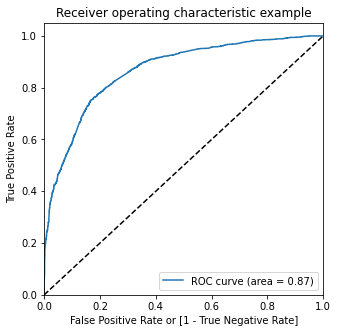

In [84]:
# Call the ROC function

import matplotlib.pyplot as plt
draw_roc(Y_train_pred_final.Converted, Y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.87 which is quite good.Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [85]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.330830,0,1,1,1,1,0,0,0,0,0,0
1,0,0.089677,0,1,0,0,0,0,0,0,0,0,0
2,1,0.073881,0,1,0,0,0,0,0,0,0,0,0
3,1,0.370009,0,1,1,1,1,0,0,0,0,0,0
4,1,0.961093,1,1,1,1,1,1,1,1,1,1,1


In [86]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.572517  0.986040  0.188149
0.2   0.2  0.689980  0.949744  0.448529
0.3   0.3  0.765523  0.898557  0.641869
0.4   0.4  0.787267  0.805491  0.770329
0.5   0.5  0.791078  0.739879  0.838668
0.6   0.6  0.773593  0.668683  0.871107
0.7   0.7  0.740417  0.550954  0.916522
0.8   0.8  0.707241  0.442066  0.953720
0.9   0.9  0.659493  0.312238  0.982266


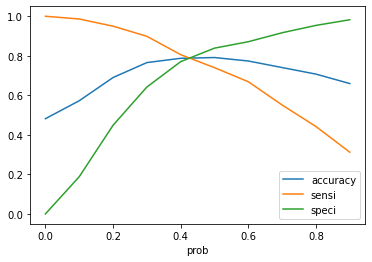

In [87]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [88]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

Y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.330830,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.089677,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.073881,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.370009,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.961093,1,1,1,1,1,1,1,1,1,1,1,1


In [89]:
# Let's check the accuracy now

metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.7899574086527684

In [90]:
# Let's create the confusion matrix once again
confusion1 =  metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)
confusion1

array([[1832,  480],
       [ 457, 1692]], dtype=int64)

In [91]:
# Let's evaluate the other metrics as well

TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [92]:
# Calculate Sensitivity

TP/(TP+FN)

0.7873429502093997

In [93]:
# Calculate Specificity

TN/(TN+FP)

0.7923875432525952

##  Step 4: Making Predictions on the Test Set¶
Let's now make predicitons on the test set

In [94]:
# checking the test dataset
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,spe_IT Projects Management,spe_International Business,spe_Marketing Management,spe_Media and Advertising,spe_Operations Management,spe_Retail Management,spe_Rural and Agribusiness,spe_Services Excellence,spe_Supply Chain Management,spe_Travel and Tourism
4771,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6122,7.0,66,7.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9202,4.0,947,4.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6570,3.0,861,3.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2668,8.0,898,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [95]:
# Scale the test set as well using just 'transform'
X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [96]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4771,-0.943022,1,0,0,0,0,1,0,0,0,0
6122,-0.826165,0,0,0,0,0,0,0,1,0,0
9202,0.733689,0,0,0,0,0,1,0,1,0,0
6570,0.581422,0,0,0,1,0,1,0,1,0,0
2668,0.646932,0,0,0,0,0,1,0,1,1,0


In [97]:
X_test_sm = sm.add_constant(X_test[col])

In [98]:
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4771,1.0,-0.943022,1,0,0,0,0,1,0,0,0,0
6122,1.0,-0.826165,0,0,0,0,0,0,0,1,0,0
9202,1.0,0.733689,0,0,0,0,0,1,0,1,0,0
6570,1.0,0.581422,0,0,0,1,0,1,0,1,0,0
2668,1.0,0.646932,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,-0.833248,0,0,0,0,0,1,0,1,1,0
6583,1.0,-0.330411,0,0,0,0,0,1,0,1,0,0
5531,1.0,1.881006,0,0,0,0,0,0,0,1,0,0
3056,1.0,0.737230,0,0,0,1,0,1,0,1,0,0


In [99]:
# Make predictions on the test set and store it in the variable 'y_test_pred' and putting in array
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771    0.996839
6122    0.154358
9202    0.730812
6570    0.357733
2668    0.513236
4233    0.830836
3368    0.781086
9091    0.489946
5972    0.175146
3631    0.800545
dtype: float64

In [100]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [101]:
# Let's see the head
y_pred_1.head()

,0
4771,0.996839
6122,0.154358
9202,0.730812
6570,0.357733
2668,0.513236


In [102]:
# Converting y_test to dataframe
Y_test_df = pd.DataFrame(Y_test)

In [103]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

In [104]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([Y_test_df, y_pred_1],axis=1)

In [105]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996839
1,0,0.154358
2,0,0.730812
3,1,0.357733
4,1,0.513236


In [106]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [107]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996839
1,0,0.154358
2,0,0.730812
3,1,0.357733
4,1,0.513236


In [108]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [109]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996839,1
1,0,0.154358,0
2,0,0.730812,1
3,1,0.357733,0
4,1,0.513236,1


In [110]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7892259414225942

In [111]:
# make the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[787, 209],
       [194, 722]], dtype=int64)

In [112]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [113]:
# Calculate sensitivity
TP / float(TP+FN)

0.7882096069868996

In [114]:
# Calculate specificity
TN / float(TN+FP)

0.7901606425702812

### Precision-Recall View
Let's now also build the training model using the precision-recall view

In [115]:
#Looking at the confusion matrix
confusion = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.Predicted )
confusion

array([[1939,  373],
       [ 559, 1590]], dtype=int64)

### Precision
TP / TP + FP

In [116]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8099847172694855

### Recall
TP / TP + FN

In [117]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7398790134946487

## Precision and recall tradeoff

In [118]:
from sklearn.metrics import precision_recall_curve

In [119]:
Y_train_pred_final.Converted,Y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [120]:
p, r, thresholds = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Conversion_Prob)

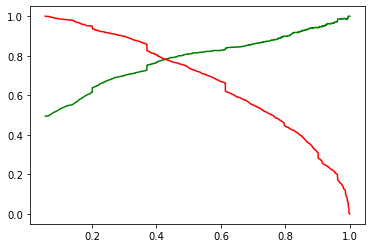

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [122]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

Y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.330830,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.089677,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.073881,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.370009,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.961093,1,1,1,1,1,1,1,1,1,1,1,1


In [123]:
# Let's check the accuracy now

metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.7917507285362027

In [124]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(Y_train_pred_final.Converted,Y_train_pred_final.final_predicted )
confusion2

array([[1865,  447],
       [ 482, 1667]], dtype=int64)

In [125]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
# Calculate Precision

TP/(TP+FP)

0.7885525070955535

In [127]:
# Calculate Recall

TP/(TP+FN)

0.7757096323871568

This cutoff point seems good 

##  Making Predictions on the Test Set

In [128]:
# Make predictions on the test set and store it in the variable 'y_test_pred' and storing in array

y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771    0.996839
6122    0.154358
9202    0.730812
6570    0.357733
2668    0.513236
4233    0.830836
3368    0.781086
9091    0.489946
5972    0.175146
3631    0.800545
dtype: float64

In [129]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [130]:
# Let's see the head

y_pred_1.head()

,0
4771,0.996839
6122,0.154358
9202,0.730812
6570,0.357733
2668,0.513236


In [131]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(Y_test)

In [132]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [133]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
4771,1,0.996839
6122,0,0.154358
9202,0,0.730812
6570,1,0.357733
2668,1,0.513236


In [134]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [135]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
4771,1,0.996839
6122,0,0.154358
9202,0,0.730812
6570,1,0.357733
2668,1,0.513236


In [136]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [137]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
4771,1,0.996839,1
6122,0,0.154358,0
9202,0,0.730812,1
6570,1,0.357733,0
2668,1,0.513236,1


In [138]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7866108786610879

In [139]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[799, 197],
       [211, 705]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Calculate Precision

TP/(TP+FP)

0.7815964523281597

In [142]:
# Calculate Recall

TP/(TP+FN)

0.769650655021834